**АНАЛИЗ КЛИЕНТОВ ФИТНЕС ЦЕНТРА «КУЛЬТУРИСТ-ДАТАСАЕНТИСТ» И ВЕРОЯТНОСТЬ ИХ ОТТОКА**

**Описание проекта**

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
* спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    * выделить целевые группы клиентов;
    * предложить меры по снижению оттока;
    * определить другие особенности взаимодействия с клиентами.

**Описание данных**

Данные содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Набор данных включает следующие поля:
* **'Churn'** — факт оттока в текущем месяце;


Данные клиента за предыдущий до проверки факта оттока месяц:

* **'gender'** — пол;
* **'Near_Location'** — проживание или работа в районе, где находится фитнес-центр;
* **'Partner'** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* **Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* **'Phone'** — наличие контактного телефона;
* **'Age'** — возраст;
* **'Lifetime'** — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* **'Contract_period'** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* **'Month_to_end_contract'** — срок до окончания текущего действующего абонемента (в месяцах);
* **'Group_visits'** — факт посещения групповых занятий;
* **'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента;
* **'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;
* **'Avg_additional_charges_total'** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

**Оглавление:**


[Шаг 1. Загрузка данных](#step_1)


[Шаг 2. Исследовательский анализ данных (EDA)](#step_2)


[Шаг 3. Прогнозирования оттока клиентов](#step_3)


[Шаг 4. Кластеризация клиентов](#step_4)


[Шаг 5. Общий вывод](#step_5)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage 

In [53]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

<a id='step_1'></a>
**Шаг №1. Загрузим данные**

In [54]:
data = pd.read_csv('/datasets/gym_churn.csv') 

In [55]:
data.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3295,1,1,1,0,1,1,0,27,40.308361,1.0,3,2.107138,2.208087,1
1231,0,1,0,0,0,6,0,30,196.214997,6.0,4,1.969049,2.023380,0
136,1,1,0,0,1,1,0,32,96.917213,1.0,2,1.024950,0.906517,1
3472,1,0,0,0,1,1,1,27,23.366141,1.0,11,2.453019,2.421933,0
566,1,1,1,1,1,1,0,30,164.145306,1.0,6,0.233330,0.074504,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [57]:
#переведем названия признаков к строчному 
data.columns = data.columns.str.lower()

In [58]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [59]:
data.month_to_end_contract.unique()

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

In [60]:
data.lifetime.unique()

array([ 3,  7,  2,  0,  1, 11,  4,  8, 14,  6,  5, 15, 12, 21, 10, 20,  9,
       13, 17, 16, 24, 22, 31, 26, 23, 18, 19, 27, 29])

In [61]:
data.age.unique()

array([29, 31, 28, 33, 26, 34, 32, 30, 23, 27, 35, 25, 36, 24, 21, 37, 22,
       19, 20, 38, 39, 18, 41])

In [62]:
#заменим тип данных на uint8 для соот. признаков
data[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'churn']] = data[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'churn']].astype('uint8')

In [63]:
data[['month_to_end_contract', 'lifetime']] = data[['month_to_end_contract', 'lifetime']].astype('uint8')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null uint8
near_location                        4000 non-null uint8
partner                              4000 non-null uint8
promo_friends                        4000 non-null uint8
phone                                4000 non-null uint8
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null uint8
lifetime                             4000 non-null uint8
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null uint8
dtypes: float64(3), int64(3), uint8(8)
memory usage: 218.9 KB


In [65]:
#проверим на повторения
data.duplicated().sum()

0

**ВЫВОД**: Всего 4000 строк, пропусков нет, дубпликатов нет. Заменили названия столбцов на строчный, тем самым снизив размерность данных. 

<a id='step_2'></a>
**Шаг №2. Исследовательский анализ данных (EDA)**

In [15]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [16]:
#data.query('churn == 1').describe()

In [17]:
#data.query('churn == 0').describe()

In [18]:
# разделим параметры на качественные и количественные для удобства анализа

param_bin = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']

param_int_1 = ['month_to_end_contract', 'lifetime', 'contract_period', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
param_int_2 = ['age', 'avg_additional_charges_total']
features = param_int_1 + param_int_2

In [19]:
# посмотрим на среднее значение признаком в разбивке по churn (ушел/остался)
data_param_bin = data.groupby('churn')[param_bin].mean().unstack().reset_index()
data_param_bin.columns = ['param', 'churn', 'value']

data_param_int_1 = data.groupby('churn')[param_int_1].mean().unstack().reset_index()
data_param_int_1.columns = ['param', 'churn', 'value']

data_param_int_2 = data.groupby('churn')[param_int_2].mean().unstack().reset_index()
data_param_int_2.columns = ['param', 'churn', 'value']

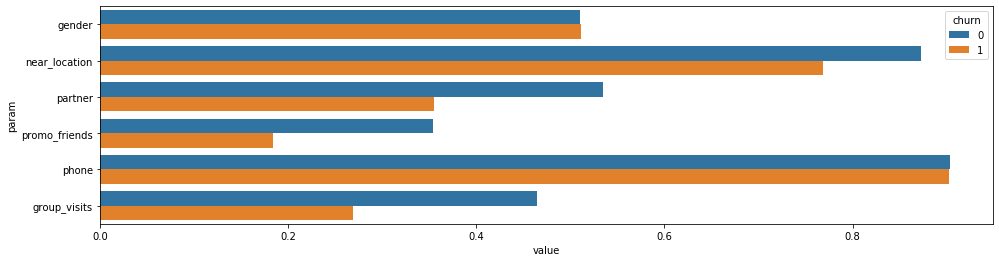

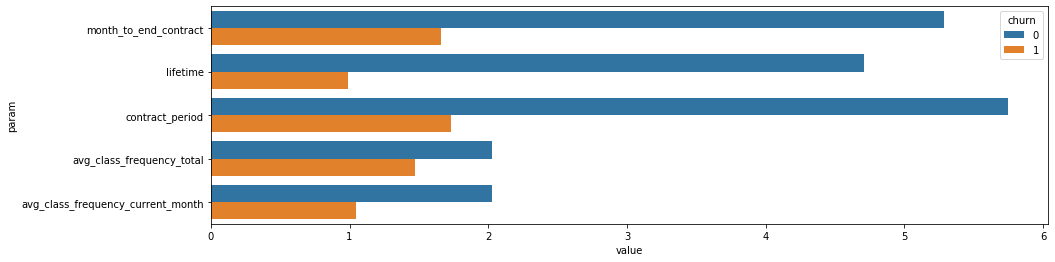

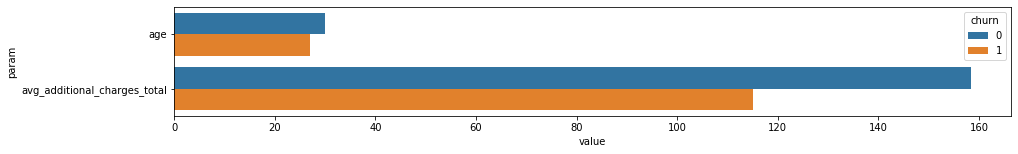

In [20]:
plt.figure(figsize=(16, 4))
sns.barplot(y ='param', x = 'value', hue = 'churn', data = data_param_bin)
plt.show()

plt.figure(figsize=(15, 4))
sns.barplot(y ='param', x = 'value', hue = 'churn', data = data_param_int_1)
plt.show()

plt.figure(figsize=(15, 2))
sns.barplot(y ='param', x = 'value', hue = 'churn', data = data_param_int_2)
plt.show()

In [21]:
data.groupby(['churn', 'contract_period']).churn.count().unstack()

contract_period,1,6,12
churn,,,
0,1273,729,937
1,934,104,23


При разделении пользователей на две группы: кто ушел и кто занимается, можно сказать, что пользователи, которые ушли, реже живут близко к фитнес цетру, реже являются пользователями "партнерской" программы, реже приходят через друзей и реже ходят на групповые занятия. Пользователи, которые ушли, заключали договор в среднем на 1,8 месяцев, ходили примерно 1-1.5 раз в неделю и переставали ходить через месяц, после заключения договора. Постоянные пользователи заключают договор в среднем на пол-года и посящают клуб в среднем 2 раза в неделю. По половому и возрастному признакам группы в среднем не различаются.

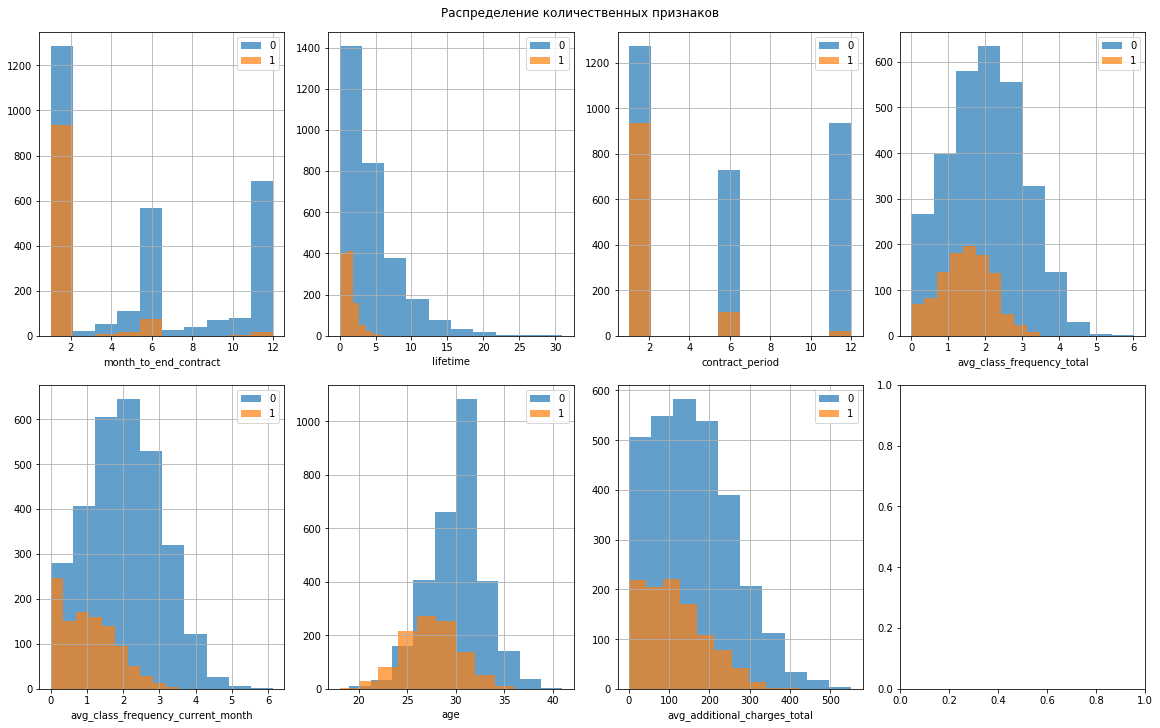

In [22]:
# посмотрим на распределение количественных признаков
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10), constrained_layout=True)

for idx, feat in  enumerate(features):
    data.query('churn == 0')[feat].hist(alpha = 0.7, label ='0', ax=axes[idx // 4, idx % 4])
    data.query('churn == 1')[feat].hist(alpha = 0.7, label = '1', ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_xlabel(feat)
    axes[idx // 4, idx % 4].legend()
    
fig.suptitle('Распределение количественных признаков')
plt.show()

В целом, группы распределенны одинаково, но можно еще раз отметить, что набольшее количество пользователей "отваливаются" с контраном в 1 месяц и, соответсвенное, за 1 месяц до истечения договора, а также более молодые клиенты.

In [23]:
#data[features].hist(figsize=(20,12));

In [24]:
#sns.pairplot(data[features + ['churn']], hue='churn');

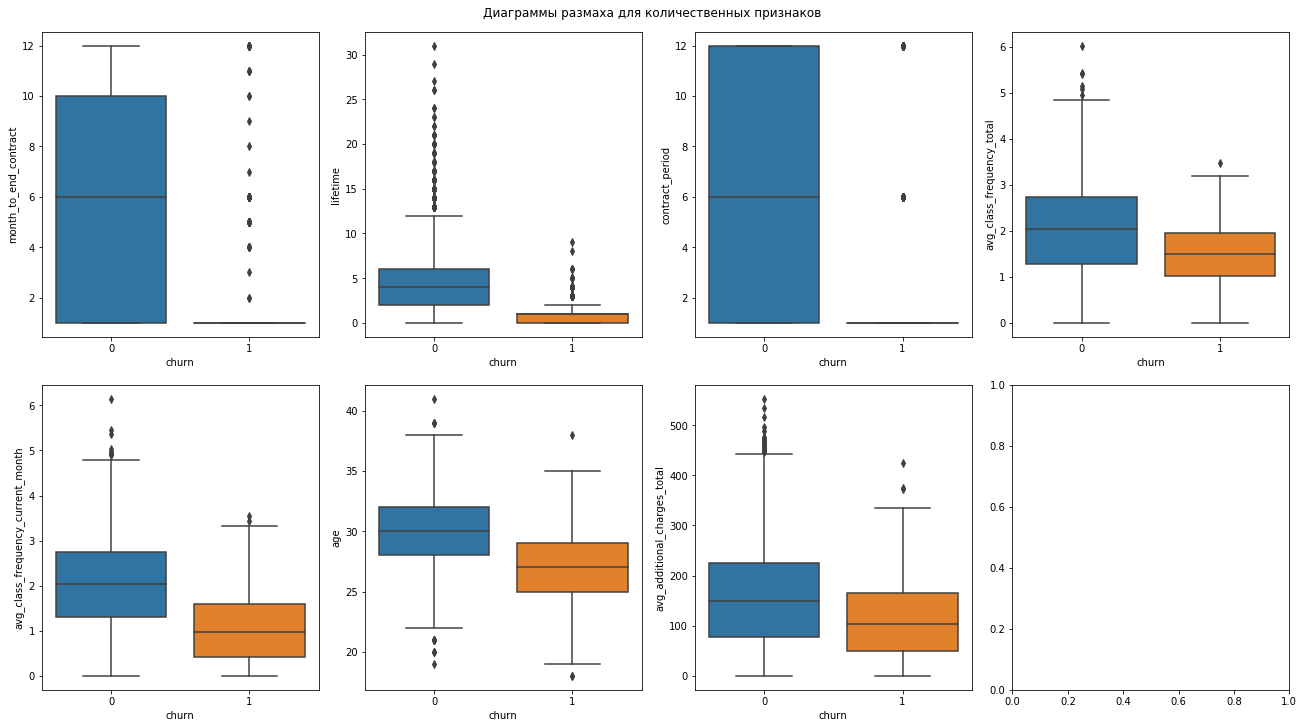

In [25]:
# посмотрим на диаграмму размаха для коилчественных признаков

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10), constrained_layout=True)

for idx, feat in  enumerate(features):
    sns.boxplot(x='churn', y= feat, data=data, ax=axes[idx // 4, idx % 4])
    #axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlabel('churn')
    axes[idx // 4, idx % 4].set_ylabel(feat)
    
fig.suptitle('Диаграммы размаха для количественных признаков');

По диаграмме размаха можно сказать, что выбросы есть, но все "жизненные": есть пользователи, которые "отвалились" с контраном на 12 месяцев, есть пользователи, кто не первый год является членом клуба. Для количества посещений в неделю - максимальное значение 6,5. 

In [26]:
# посмотрим, есть ли пользватели с churn = 1 и lifetume > contract_period
#data.query('churn == 1 and lifetime > contract_period').sample(10)

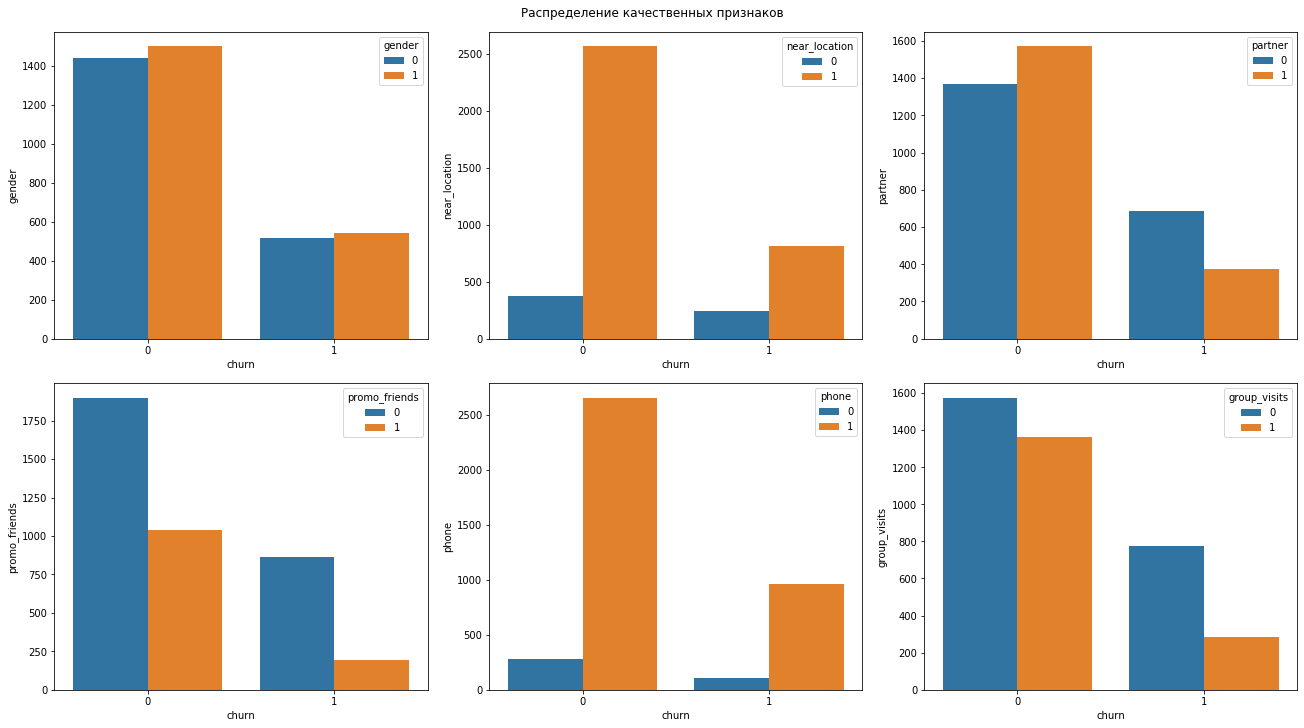

In [27]:
# посотрим на распределение качетсвенных признаков 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)

for idx, feat in  enumerate(param_bin):
    sns.countplot(x='churn', hue = feat, data=data, ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].set_xlabel('churn')
    axes[idx // 3, idx % 3].set_ylabel(feat);

fig.suptitle('Распределение качественных признаков');    

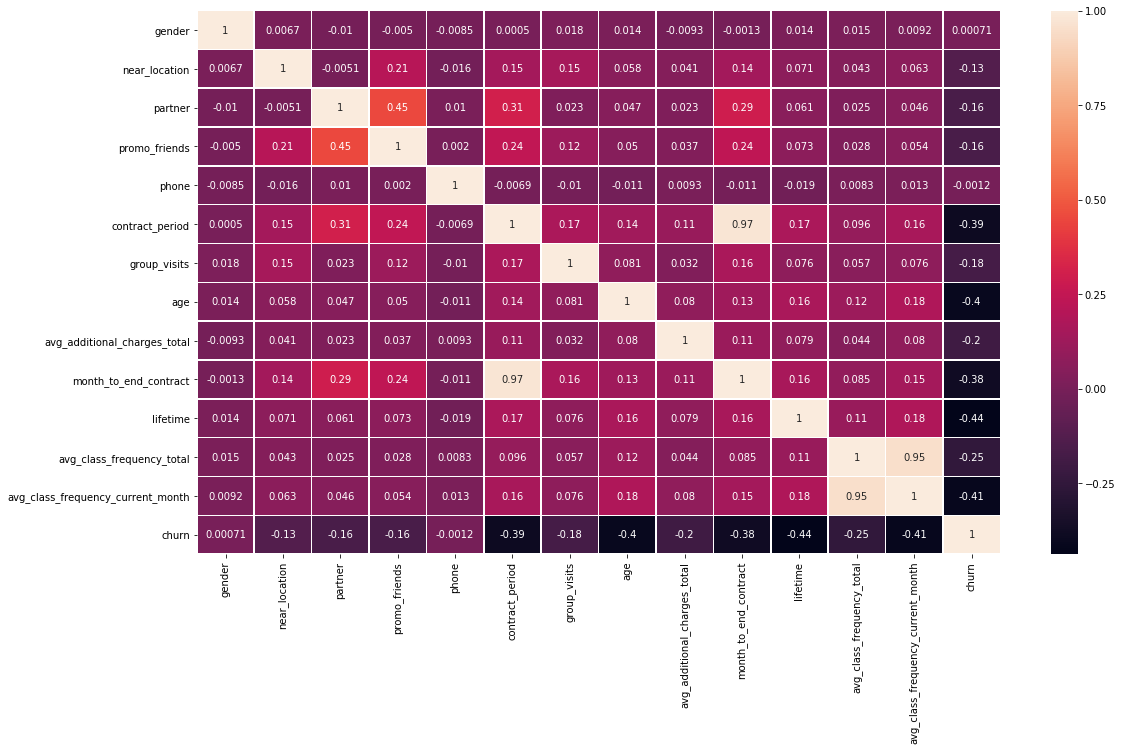

In [28]:
# посмотрим на корреляцию
cm = data.corr(method='pearson')
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(cm, annot = True, linewidths=.5)
#ax.set_ylim(7, 0)  
plt.show()

In [66]:
# между признаками посещения всего и в месяц 
# и длительность контракта и кол-во месяцев до его окончания налюблюдается сильная корреляция.
# удалим признаки кол-во месяц до окончания контракта и среднее кол-во посещений всего из данных 
# для построения мат. модели прогнозирования оттока

data_churn = data.drop(['contract_period', 'avg_class_frequency_total'], axis = 1)

In [67]:
data_churn.head()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,1,29,14.227470,5,3,0.000000,0
1,0,1,0,0,1,1,31,113.202938,12,7,1.910244,0
2,0,1,1,0,1,0,28,129.448479,1,2,1.736502,0
3,0,1,1,1,1,1,33,62.669863,12,2,3.357215,0
4,1,1,1,1,1,0,26,198.362265,1,3,1.120078,0


**ВЫВОД:**
В целом, на первый взгляд бросается только, что клиенты, заключившие договор на месяц, "отваливаются" чаще. По остальным признакам между группам не видно яркий отличий. 
Признаки время абонимента и срок до его окончания и признаки кол-во посещений всего и в месяц между собой коррелируются, поэтому удалили признаки срок абонимента и среднее кол-во посещений всего для построения мат. модели.

<div class="alert alert-success">

**Комментарий ревьювера**
    
Все верно!

<a id='step_3'></a>
**Шаг №3. Прогнозирования оттока клиентов**

In [68]:
X = data_churn.drop('churn', axis = 1)
y = data_churn['churn']

In [69]:
# разобьем данные на обучающую и валидационную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 0)

In [70]:
#cтандатизируем данные по параметрам X_train выборики
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [34]:
# построим модель методом лог. регрессия
lr_model = LogisticRegression(solver='liblinear', random_state=0)
lr_model.fit(X_train_st, y_train)

# и сделаем прогноз
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

In [35]:
#построим модель методом случайный лес
rf_model = RandomForestClassifier(random_state=0, n_estimators = 100)
rf_model.fit(X_train_st, y_train)

# и сделаем прогноз
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

In [36]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


In [37]:
# посмотрим на метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title = 'Метрики для модели случайного леса:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.84
	F1: 0.84
	ROC_AUC: 0.97
Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.80
	F1: 0.82
	ROC_AUC: 0.96


In [38]:
index = pd.DataFrame(data = lr_model.coef_, columns = X_test.columns)
index.loc[1] = rf_model.feature_importances_
index = index.T
index.loc['null_coef'] = [float(lr_model.intercept_), 0]
index.columns = ['lr_model', 'rf_model']
index.sort_values(by = 'lr_model', ascending = False)

,lr_model,rf_model
gender,0.020931,0.015557
near_location,-0.066397,0.012228
partner,-0.067821,0.016232
phone,-0.074714,0.008258
promo_friends,-0.140510,0.013816
group_visits,-0.378394,0.020533
avg_additional_charges_total,-0.566779,0.122514
age,-1.165476,0.147161
avg_class_frequency_current_month,-1.281404,0.209186
month_to_end_contract,-1.367036,0.119078


Модель обеих моделей, в принципе, на одном уровне, но так как нам интересней живые клиенты и, соответсвенно, полнота, то лучше себя показывает модель линейной регрессии. При этом более значемые признаки - возраст, месяцев до окончания абонимента и среднее ко-во посещений. 

(п.с. по постановки задачи - Как понять, что клиент больше не с вами?, я делаю вывод, что важнее полнота, чтобы вариант 01 ближе к нулю, но в целом тут вопрос, для чего использовать - привлекать тех, кто перестал ходить, или повышать лояльность к живым клиентам.) 

<a id='step_4'></a>
**Шаг №4. Кластеризация клиентов**

In [71]:
#уберем из данных ненужный столбец churn
data_class = data.drop('churn', axis = 1)

In [72]:
# стандартизируем данные
sc = StandardScaler()
data_class_sc = sc.fit_transform(data_class)

In [73]:
# построим матрицу расстояний
linked = linkage(data_class_sc, method = 'ward') 

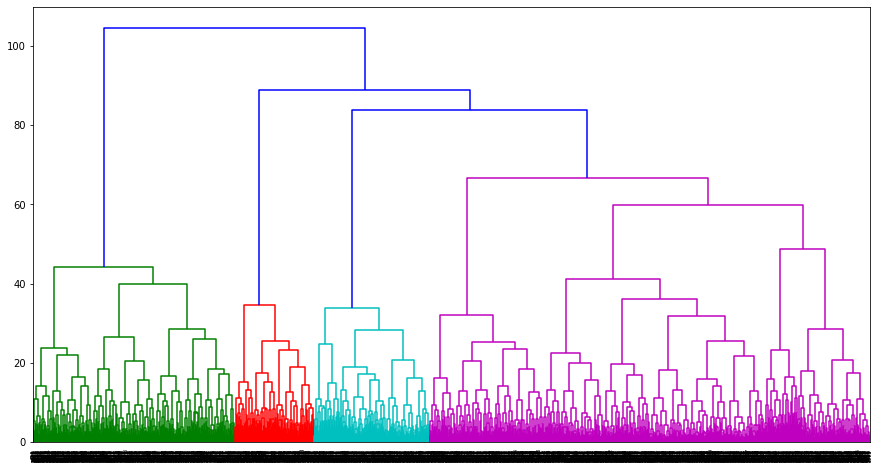

In [42]:
# нарисуем дендрограмму
plt.figure(figsize=(15, 8))  
dendrogram(linked, orientation='top')
plt.show() 

In [74]:
# зададим модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state = 0)

# спрогнозируем кластеры 
labels = km.fit_predict(data_class_sc)
data['cluster'] = labels

In [75]:
#посмотрим на средние значения признаков для кластеров
clusters = data.groupby('cluster')[data.columns].mean().T
clusters.loc['total'] = data.groupby('cluster').gender.count().rename('total')
clusters.loc['total_%'] = 100 *clusters.loc['total'] / data.shape[0]

In [76]:
clusters

cluster,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


По средним значения можно сказать, группы четко разделены по признакам расстояние к фитнес цетру, предоставление телефона, период контракта, количество времени до окончания контратка, время жизни и частота посещений. 

In [46]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

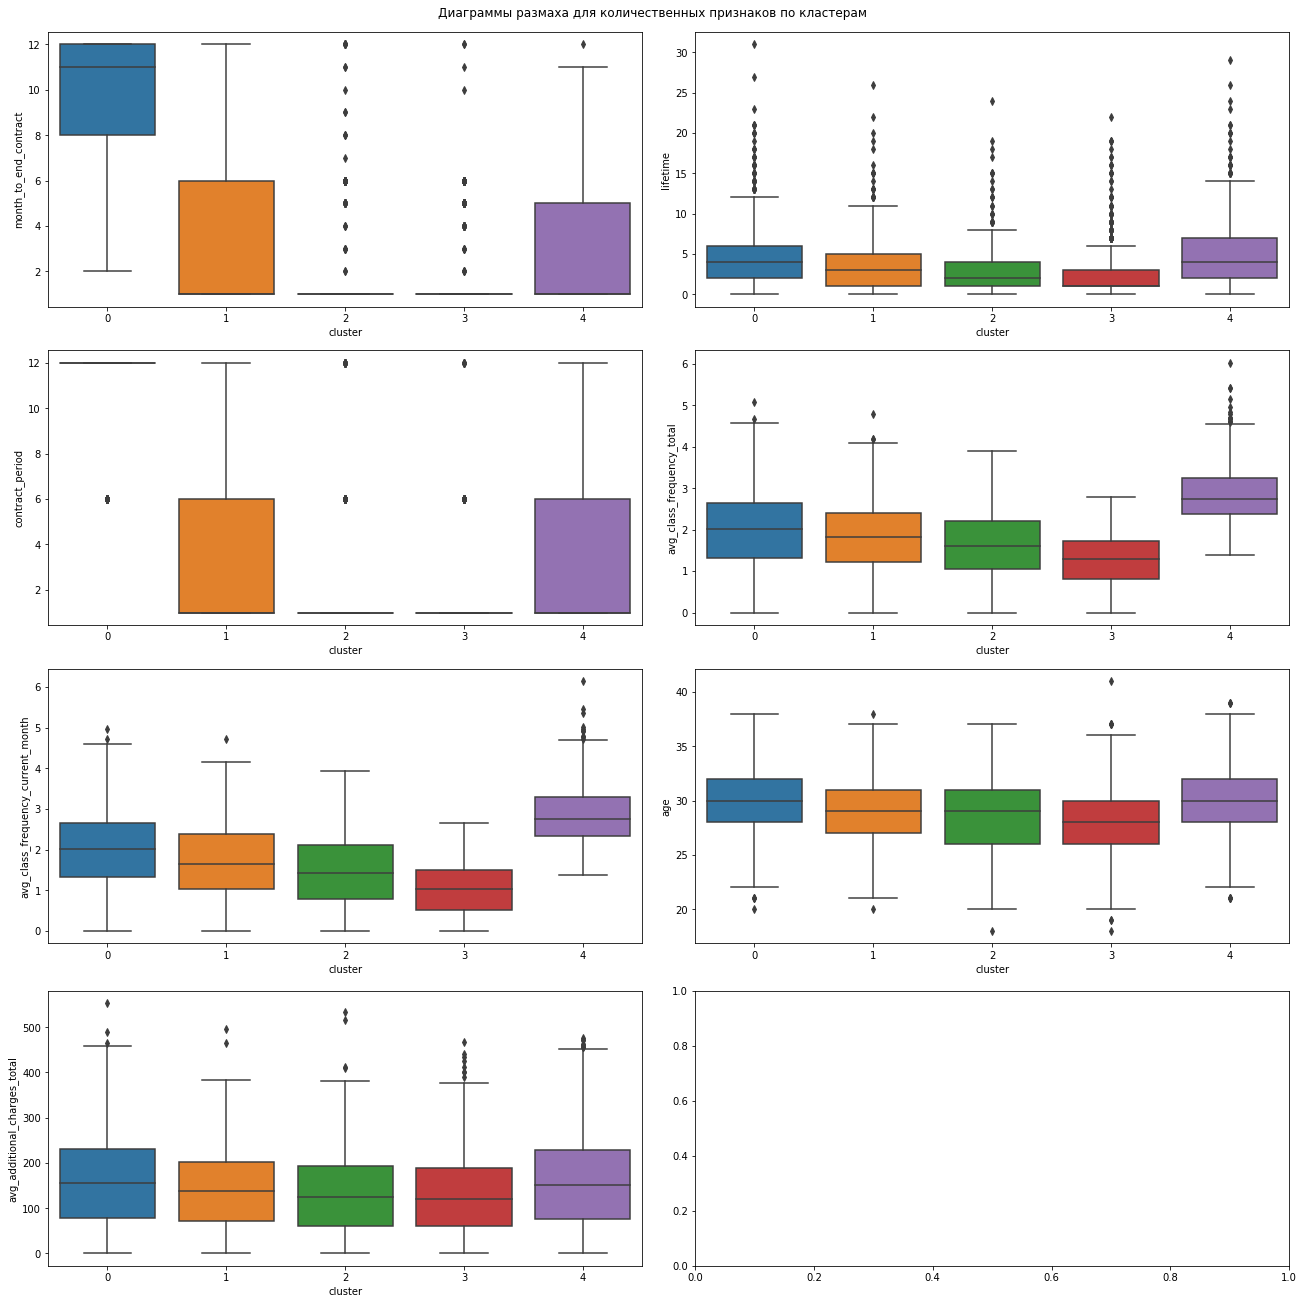

In [47]:
# посмотрим на диаграмму размаха для коилчественных признаков

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 18), constrained_layout=True)

for idx, feat in  enumerate(features):
    sns.boxplot(x='cluster', y= feat, data=data, ax=axes[idx // 2, idx % 2])
    #axes[idx // 4, idx % 4].legend()
    axes[idx // 2, idx % 2].set_xlabel('cluster')
    axes[idx // 2, idx % 2].set_ylabel(feat)
    
fig.suptitle('Диаграммы размаха для количественных признаков по кластерам');

In [48]:
data.query('cluster == 0').contract_period.value_counts()

12    823
6     188
Name: contract_period, dtype: int64

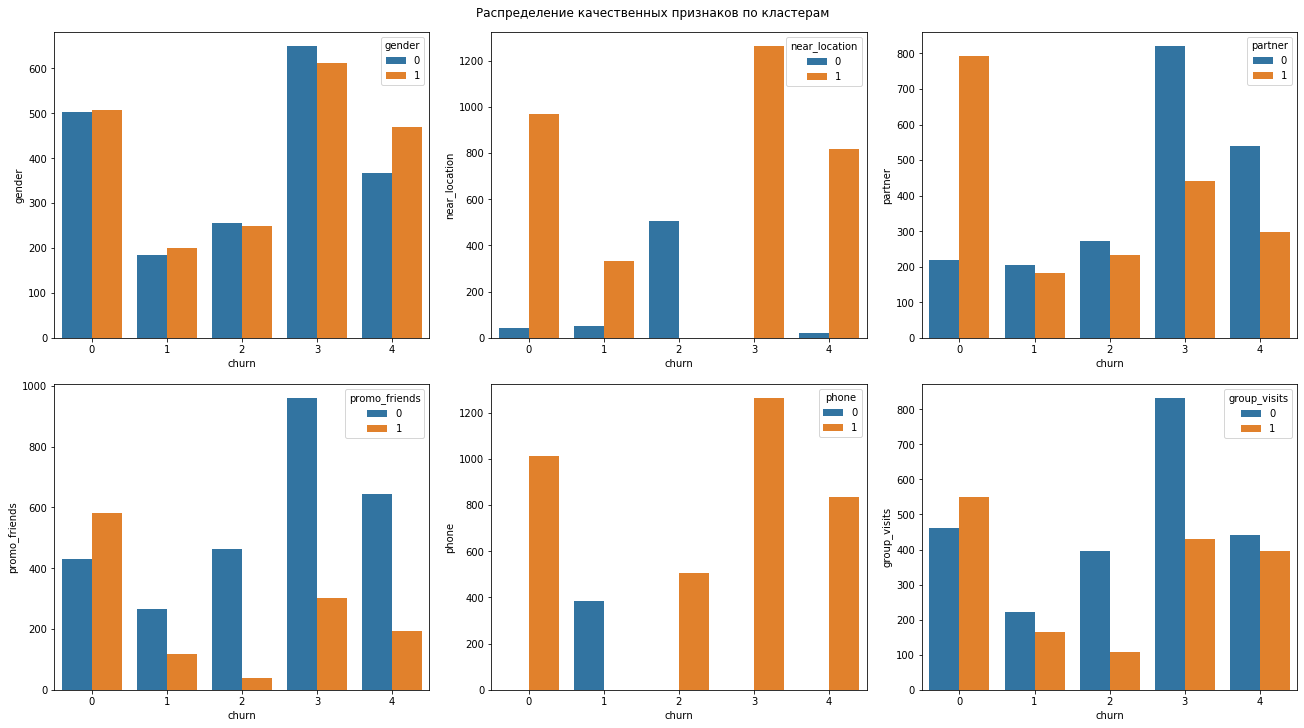

In [49]:
# посотрим на распределение качетсвенных признаков 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)

for idx, feat in  enumerate(param_bin):
    sns.countplot(x='cluster', hue = feat, data=data, ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].set_xlabel('churn')
    axes[idx // 3, idx % 3].set_ylabel(feat);

fig.suptitle('Распределение качественных признаков по кластерам');    

In [50]:
clusters.loc[['churn', 'total_%']]

cluster,0,1,2,3,4
churn,0.027695,0.267532,0.443564,0.514263,0.0681
total_%,25.275000,9.625000,12.625000,31.550000,20.9250


**ВЫВОД:**

В целом, клиентов финтес-центра можно поделить по следующим признакам:
- клиенты, которые не предоставили свой номер телефона (классетр 1)
- клиенты, которые заключили договор на 12 месяц (класстер 0)
- клиенты, которые живут не близко и заключили договор на короткий срок (1 месяц) (класстер 2)
- клиенты, которые живут близко и заключили договор на короткий срок (1 месяц) (класстер 3)
- постоянные члены фитнес зала (класстер 4)

При "зона риска" - группы 2 и 3 с долей оттока в 44-52% и группа 1 с долей оттока в 26%. 

<a id='step_5'></a>
**ОБЩИЙ ВЫВОД:**

Клинетов финтес цетра можно поделить на 5 групп: 
- клиенты, которые не предоставили свой номер телефона. Доля таких клинетов состваляет 9.62%, а процент оттока - 26,75%.Эти клиенты заключают договор в основном на 1 месяц, занимаются в целом чуть меньше среднего, приходят как самостоятельно, так через друзей или парнерские программы. 
- клиенты со сроком абонемента 12 месяцев. Доля таких клинетов состваляет 25%, а а процент оттока - 2,8%. Такие клиенты в основном жувут близко и занимаются выше среднего.
- клиенты, которые близко живут и заключили договор на короткий срок. Доля таких клиентов 31,5%, а процент оттока - 51%. 
- клиенты, которые живут неблизко и также заключили договор на короткий срок. Доля таких клиентов 12,6%, а процент оттока - 44%. При этом если сравнивать клиентов, которые заключили договор на один мессяц, клиенты, которые живут не близко, ходят чаще, чем клиенты, которые живут блико к фитнес центру. 
- остальные, живые клиенты фитнес зала, возраста выше среднего, которые покызвают наиболее высокую активность по посещениям и дополнительным тратам. Таких клиентов 20%, и доля оттока у них 6,8%.


Можно выделить три целевые группы "оттока": клиенты, кто не дает телефон, и клиенты, которые заключили договор на один месяц и живут близко/не близко. Группа, которая заключила договор на один месяц и живет близко, наиболее объемная: доля таких клиентов составляет 31%, а половина из них прекращает пользователься клубом. Группы, кто не дал телефон и живет не близко с договором на один месяц, менее объемные: 9,62% всех клиентов и 26,75% оттока для первой и 12,62% и 44,35% для второй соответсвенно. 

Для первой группы рекомендуется брать номер телефона, для включения в группу рассылок и обзвонов.

Для группы, кто живет близко, желателен более глубой анализ, почему они перестают пользоватеся фитнес клубом. На первый взгляд, эта группа выглядит как "решили начать новую жизнь с понедельника" и записались в фитнес клуб, но, хотя живут и близко, практически его не посещают. Аналогичная группа с договором на 1 месяц, которая живет не близко, посещает фитнес клуб чаще. Рекомендуется провести опрос, что не нравится или чтобы хотели улучшить в фитнес клубе (может быть рассписание групповых тренироков, чистоту и т.д.)

Для группы, кто живет неблизко, рассмотреть внедрение абонимента на средний период, к примеру, на 3 месяца:  



In [51]:
#for param in (features):
#    fig = plt.figure()
    
#    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize=(18,3))

#    ax1.hist(data.query('churn == 1')[param])
#    ax1.set_title("Гистограмма распеределения {} для сhurn = 1".format(param))
               
#    ax2.hist(data.query('churn == 0')[param])
#    ax2.set_title("Гистограмма распеределения {} для сhurn = 0".format(param))
#    plt.show()




#for param in param_bin:
#    data.groupby(by = ['churn', param])[param].count().unstack().plot(kind = 'bar')
#    plt.title("Распеределение для {}".format(param))
#    plt.ylabel("пользователей") 